# DLthon - 길찾은 오리들
## Base Settings

In [7]:
# importing the libraries
import keras, tensorflow as tf
from keras import layers

# keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_datasets("data_no_aug")

Found 319 files belonging to 6 classes.


I0000 00:00:1737339726.813939  208442 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 39 files belonging to 6 classes.
Found 40 files belonging to 6 classes.


## Basemodel

여기에 ResNet50 결과 입력

## EfficientNetV2L + simple2
### Designing the Model

In [3]:
# designing the model

def eV2L_simple2(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v2()(inputs)
    x = models_base.EV2L((224, 224, 3))(inputs, training=False)
    x = models_top.simple2()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])
    
    return model

In [8]:
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2.keras'),
        utils.callback_earlystop(30)
    ],
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 89s 9s/step - accuracy: 0.1730 - loss: 1.8347 - val_accuracy: 0.2308 - val_loss: 1.7097
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 686ms/step - accuracy: 0.2746 - loss: 1.7103 - val_accuracy: 0.4103 - val_loss: 1.6048
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.4097 - loss: 1.5768 - val_accuracy: 0.2821 - val_loss: 1.5822
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.3687 - loss: 1.5306 - val_accuracy: 0.4359 - val_loss: 1.4267
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.3915 - loss: 1.4215 - val_accuracy: 0.4615 - val_loss: 1.3201
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - accuracy: 0.4468 - loss: 1.3577 - val_accuracy: 0.5385 - val_loss: 1.2692
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.5884 - loss: 1.1224 - val_accuracy: 0.5897 - val_loss: 1.3000
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.5857 - loss: 1.2005 - val_accuracy: 0.3846 - val

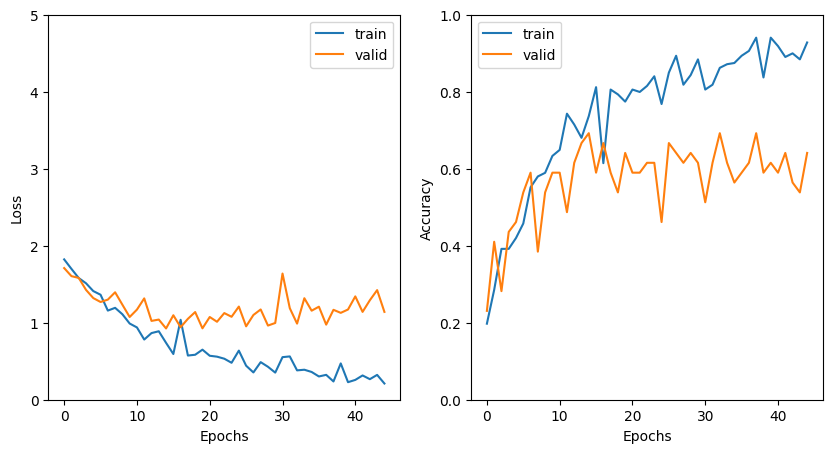

In [ ]:
utils.plot_history(eV2L_simple2_history)

In [10]:
eV2L_simple2_history_best = keras.models.load_model('eV2L_simple2.keras')
test_loss, test_acc = eV2L_simple2_history_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7250 - loss: 0.7773
Test accuracy: 0.73%, Test loss: 0.78


## Second Trial: MobileNetV2 + Top1

In [ ]:
def mV2_simple1():
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.MV2()(inputs, training=False)
    x = models_top.simple1()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

    return model

mV2_simple1_history = mV2_simple1().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('mV2_simple1.keras'),
        utils.callback_earlystop(80)
    ],
)

In [ ]:
utils.plot_history(mV2_simple1_history)

In [ ]:
mV2_simple1_best = keras.models.load_model('mV2_simple1.keras')
test_loss, test_acc = mV2_simple1_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")